# seaborn - 빈도 그래프

`statsmodels` 패키지의 설치가 필요하다.

`statsmodels`는 상관분석, 회귀분석 등 추론통계의 기능을 제공하는 패키지

## 다변량 데이터

여러 개의 변수로 이루어진 데이터

## #01. 기본 준비

### 패키지 참조

In [1]:
#패키지 참조
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np

In [2]:
# 그래프 전역 설정
plt.rcParams["font.family"] = 'Malgun Gothic'  
# plt.rcParams["font.family"] = 'AppleGothic'  

plt.rcParams["font.size"] = 12                           
plt.rcParams["figure.figsize"] = (8, 5)                
plt.rcParams["axes.unicode_minus"] = False     

#### 타이타닉 탑승객 데이터

> 출처: https://www.kaggle.com/competitions/titanic

| 변수명 | 설명 |
|---|---|
| PassengerId | 탑승객의 ID(인덱스와 같은 개념) |
| Survived | 생존유무(0은 사망 1은 생존) |
| Pclass | 객실의 등급 |
| Name | 이름 |
| Sex |성별 |
| SibSp | 동승한 형제 혹은 배우자의 수 |
| Parch | 동승한 자녀 혹은 부모의 수 |
| Ticket | 티켓번호 |
| Fare | 요금 |
| Cabin | 선실 |
| Embarked | 탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton) |

In [3]:
# 데이터 준비하기
titanic = read_excel("C:\\Users\\User\\Desktop\\궁둥박사\\BigdatamegaIT\\수업내용\\D_탐색적_데이터\\01_데이터_시각화/titanic.xlsx")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 02. 데이터 전처리
    * 범주형 데이터 처리
    * 각 요인별 데이터 타입 확인

In [4]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# 범주형 데이터 처리
df = titanic.astype({'Survived' : 'category', 'Pclass' : 'category', 'Sex' : 'category',
                     'Cabin' : "category", 'Embarked' : "category"})
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

# 03. 빈도 막대 그래프

    - 병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프

    - catplot() method 사용
    -  catplot() 은 기본적으로 범주형 변수에 대한 그래프를 그리는데 사용되지만, 다양한 플롯 유형을 지원한다.

    1. 기본 사용 방법
        * x 축으로 집단을 구분할 수 있는 범주형 변수를 설정하고 kind = 'count' 파라미터를 설정한다.

        * 그래프 크기가 rcParams 속성의 영향을 받지 않는다.
        * 크기 설정을 위해서는 caplot() method로부터 객체를 리턴받아 사이즈 설정을 개별적으로 수행해야 한다.

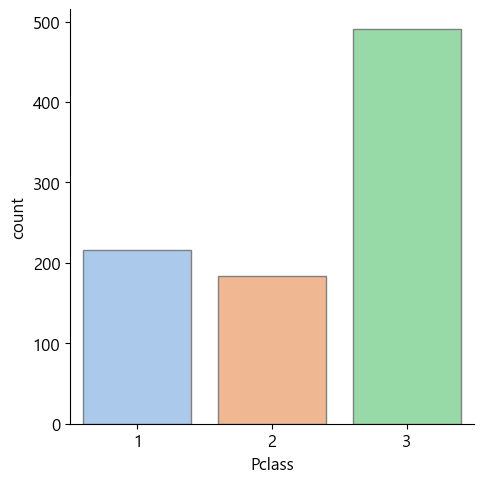

In [6]:
g = sb.catplot(data = df, 
               x = 'Pclass' ,                       # 집단을 구분하는 기분
               kind = 'count',                   # 그래프 기준
               palette= 'pastel',                # 색상표 지정
               edgecolor = '0.5')               # 막대 테두리 색상 ㅌ투명도 지정(0=불투명 ~ 1=투명, ex: 0.5=반투명)

    2. 범례 기준 추가
        - 각 막대를 구분할 수 있는 범주형 변수를 hue 파라미터로 추가
        - kind : 그래프의 종류는 범주형 축 수준 플로팅 함수의 이름(그래프 형태에 관여)

            **  "strip", "swarm", "box", "violin", "boxen", "point", "bar" 또는 "count"

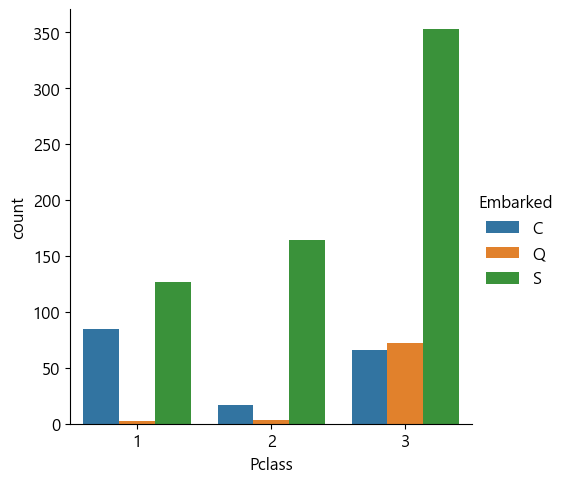

In [7]:
# 객실 등급별 탑승 지역 빈도
sb.catplot(data = df, 
           x = 'Pclass',
           kind = 'count',
           hue = 'Embarked')   # 범주 표시와 대상 설정
plt.show()

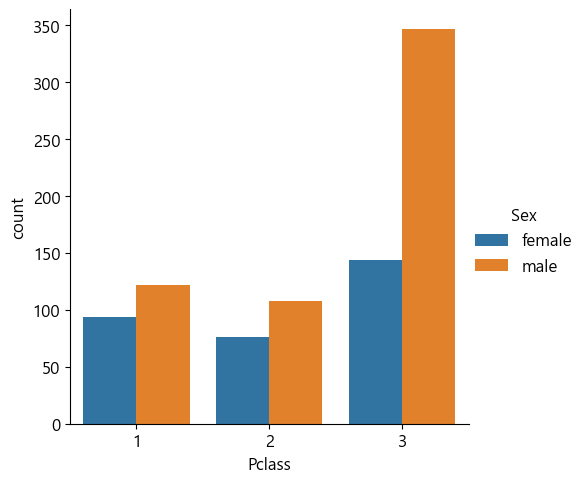

In [9]:
# 객실 등급별 성별 빈도
sb.catplot(data = df,
           x = 'Pclass',
           kind = 'count',
           hue = 'Sex')
plt.show()

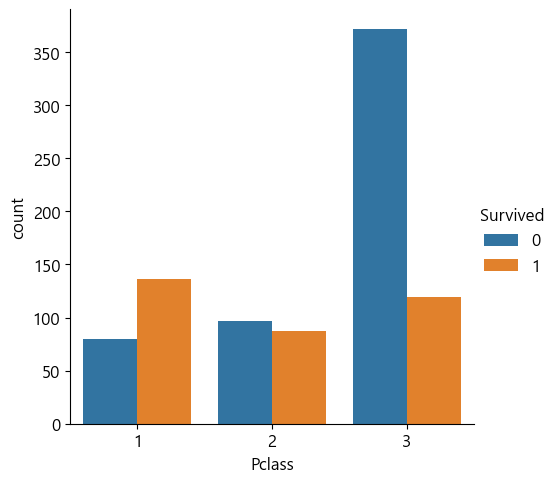

In [10]:
# 객실 등급별 생존여부 빈도
sb.catplot(data = df,
           x = 'Pclass',
           kind = 'count',
           hue = 'Survived')
plt.show()

    3. 병렬 빈도 막대 그래프
        - 이미 범주가 주어진 상황에서 추가적인 범주를 표현하고자 할 때 그래프를 두 개로 분리

        - 병렬 막대 그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프

        - Seaborn으로 병렬 빈도 막대 그래프를 그리려면 sns.catplot 함수에 kind = 'count'와 col 옵션을 추가한다.

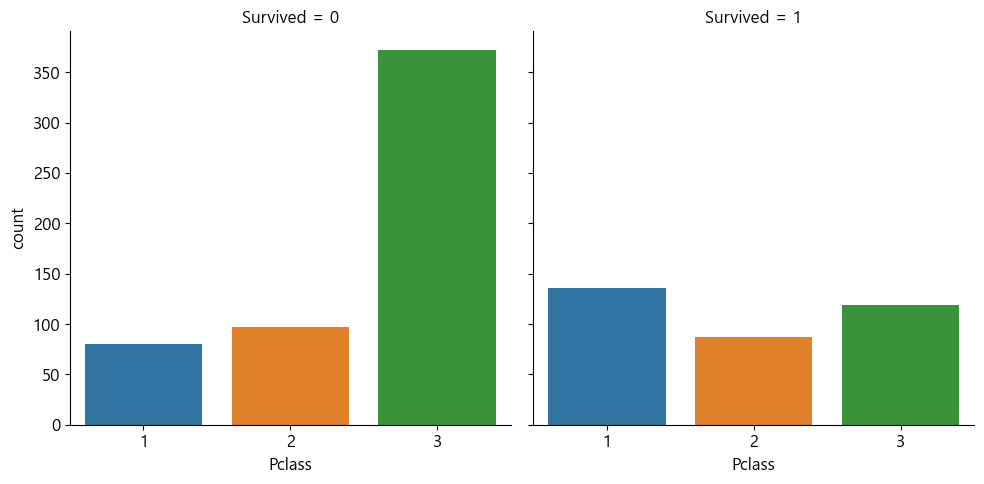

In [11]:
# 객실 등급에 따른 생존 여부를 두 개의 그래프로 분리
sb.catplot(data = df,
           x ='Pclass',
           col = 'Survived',
           kind = 'count')
plt.show()

    4. 가로 빈도 막대 그래프
        - x 파라미터 대신 y 파라미터를 사용한다.

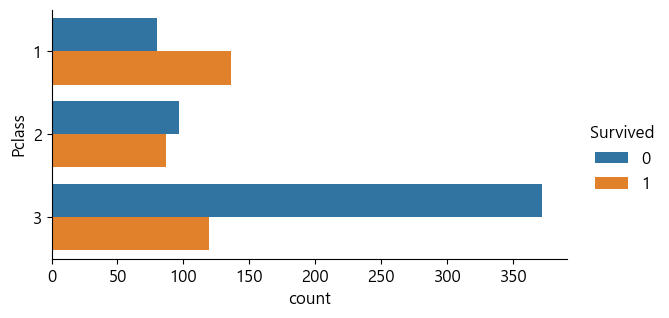

In [17]:
g = sb.catplot(data = df,
               y = 'Pclass',
               kind = 'count',
               hue = 'Survived')

# 그래프 크기 설정
g.fig.set_figwidth(7) 
g.fig.set_figheight(3)

plt.show()
